sklearn: 六大模块：分类回归聚类，神经网络不用

降维算法，模型选择，数据预处理，做预处理的时候也可以用

# 决策树模型：
决策树模型是一种非参数 __（不用对数据进行过多的预处理，基本上可以处理任何数据结构的数据）__ 的有监督学习方法 __（有监督学习就是指我需要给他输入标签）__ ，他能够从一些列有特征和标签的数据中总结出决策规则，并使用树状图的结构来呈现这些规则，以分类和回归模型，__梯度提升，随机森林等等__


__基础数据结构：标签再加上特征，标签就是指类标号__
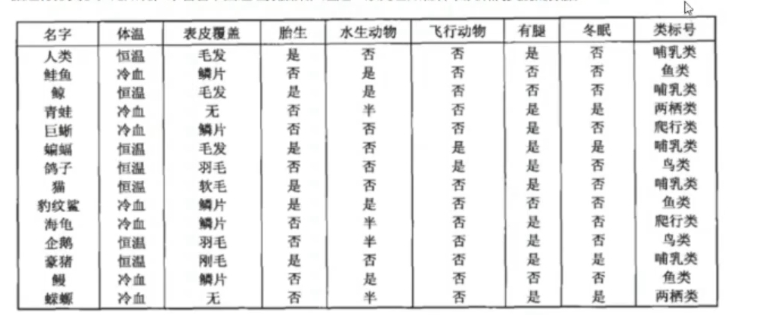
__决策树职责就是把这张表总结成一个特别简单的树，来让我们做出非常简单的决策__
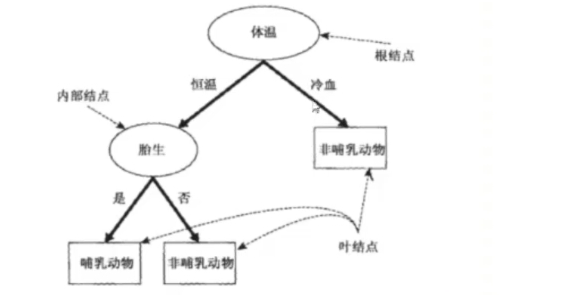
__本质就是对特征进行一系列提问__ 比如说：鲑鱼是恒温动物还是冷血动物呢？ 先看类标号：鲸鱼的体温是恒温的，那就走入恒温这一个分支，在下一个问题：他是否是胎生呢？有表格可以得出是哺乳动物

__最初的问题：上例中的体温就是根节点，在的大结论前问的每一个问题：就是中间节点，每一个得到的结论比如上例中的（非哺乳类和哺乳类）都是叶节点 注意！！！【每一个叶子节点都必须是我们的一种标签，如上例的胎生的那一个叶子节点】，哈右子节点和父节点，上面的是父节点，后面的子节点，这是一个相对的概念__

__这是对特征进行提问：怎么样才能最好的去提问时构造这个树，要是数据有无数层，怎么样才能让他适当时停下来呢？怎样防止过拟合？几乎所有的和决策树有关的模型调整方法都在围绕这样两个问题来展开。是两个复杂的问题__

# 决策树的类
模块：sklearn.tree
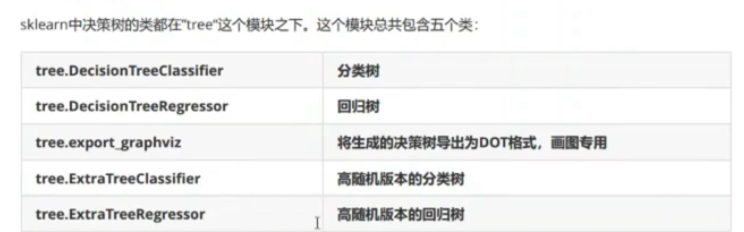

主要讲分类树：__用的最多的__

建模流程：只有三步：第一步：显示实例化，建立模型评估对象：__就是把决策树用一个变量导出来 clf = tree.DecisionTreeClassifier()__ 
第二步就是：导入训练集训练模型
第三步就是：导入测试集，从接口中调用需要的信息

__前两步要了解实例化时需要使用的参数，后面两步要了解我们的模型有哪些属性，有哪些接口__
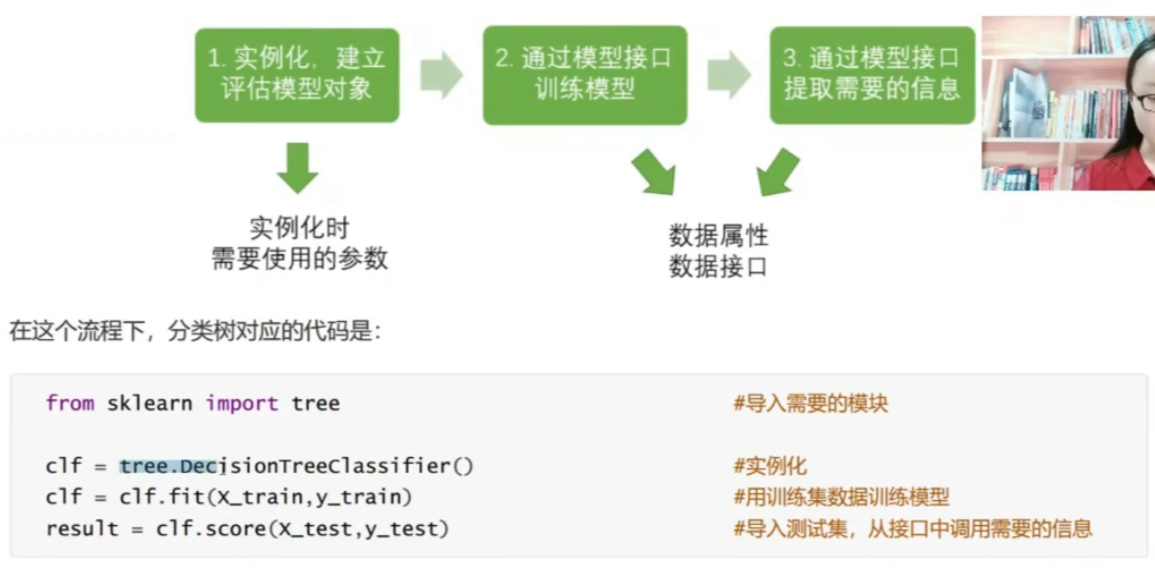
参数属性和接口：

下买你的score是比较常用的接口：__导入测试集，得到对这个模型的评估指标，默认来说就是accuracy__



# DecisionTreeClassifier（分类树）

参数很多，我们不需要清楚知道全部
## 重要参数
1. criterion: 决策树是要将表格转化成一棵树，找出最佳节点和最佳分支方法：对于一个分类树怎么衡量他的好坏呢？对于分类树来衡量最佳的指标就是 __不纯度：通常来说，不纯度越低，决策树对训练集的拟合程度越好现在各种决策树算法：分支方法上的核心：都是围绕在五个和不纯度相关的指标的最优化上，所有的分类树算法都绕不开__

__树中的每一个节点都有一个不纯度：子节点的不纯度是一定低于父节点的！！！叶子节点的不纯度一定是最低的__

__criterion这个参数就是决定不纯度的计算方法的：sklearn有两种选择__
1. 使用信息熵（entropy）
2. 使用基尼系数:
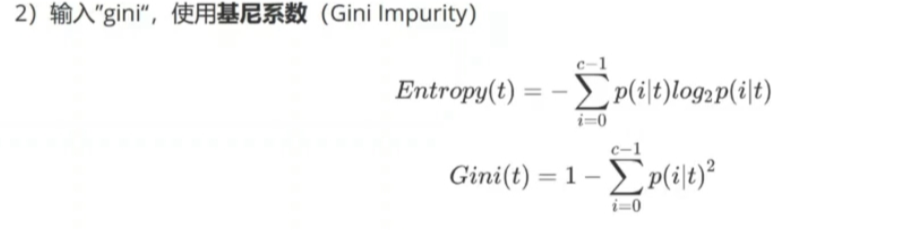

这其中t是指给定的节点，i代表标签的任意分类，$ p(i|t) $表示标签分类i在节点t所占的比例。__【注意】:sklearn实际计算的是基于信息熵的信息增益：及父节点的信息熵与子节点的信息熵之差！！！__

这两个指标sklearn自己会搞，记住这两个参数就行了

__比起基尼系数，信息熵对不纯素更加敏感，对不纯的的惩罚更强，但是在实际的使用中，这两个参数的结果差不多，信息上的计算比基尼系数要慢一些，因为基尼系数中没有对数的运算，对于高维数据或者噪音很多的数据，为了防止过拟合，基尼系数在这种情况下效果往往更好，当然这不是绝对的__

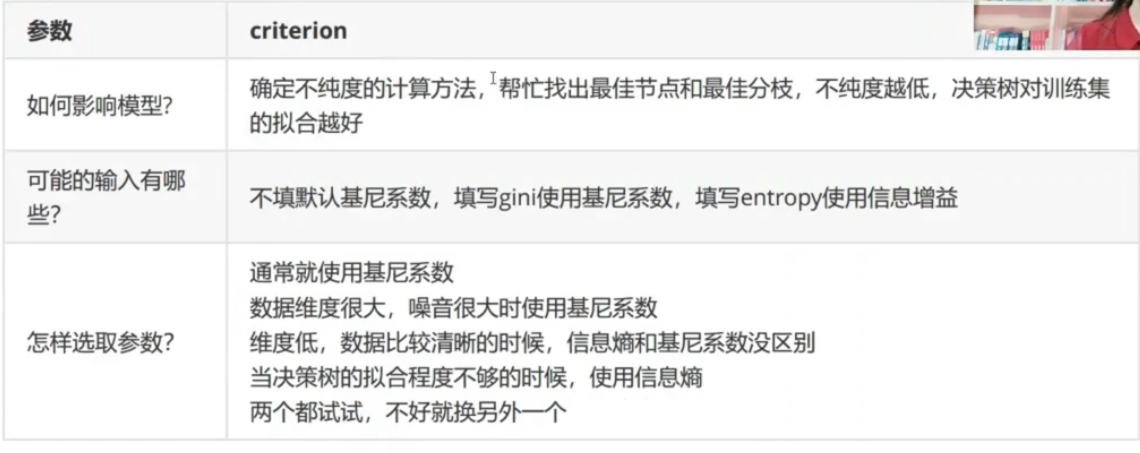
__简单意思大概就是两个都试试，谁算出来的不纯度越低，就用谁，通常只使用基尼系数，默认也是，拟合程度不够的时候，换一个信息熵算法__

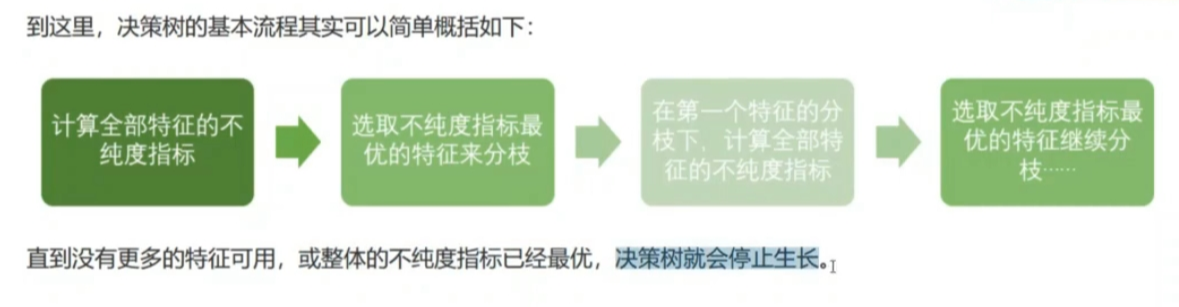

信息熵的大概概念：

信息熵就是用来描述系统信息量的不确定度。不确定性越大，则信息熵越大，反之，信息熵越小。

例如，4只猎豹参与赛跑，每只猎豹的能力都是旗鼓相当，平分秋色。我们很难确定哪只猎豹会获得胜利，因此，这种情况下，不确定性很大，信息熵就大。但是，假设让1只猎豹与3只蜗牛进行赛跑，则猎豹取胜便是毋容置疑的，因此，这种情况下，不确定性很小，信息熵就小。
因此，对于随机变量X，其分布越均衡，则不确定性越多，信息熵越大。其分布越不均衡，则不确定性越少，信息熵越少。

__就好像我用肉眼去分辨各种很像的颜色，深浅度很接近，这时候我就很难区分哪个是哪个，这时候我的不确定性就越大__

最大纯度的时候就是最后面，我已经确定分类的时候，这时候我的不确定性是0。

习惯说，不纯度越高，信息熵越高。btw，正比好理解。

所以，我们衡量的依据：通过哪一个特征能够让我们哪个节点的不纯度最低，就是信息熵最低，（纯度最高），就更好衡量。

失衡度越高，我们预测出来的信心指数会越高。

一个子节点所有样本都属于同一个类别，那我们预测出来的概率就是100%，就是一个非常高的信心指数。

决策树划分目的：就是让不纯度达到最低，信息熵达到最小

信息熵公式：

当概率为0.5的时候，信息熵最大，不纯度最大，不确定性也越大。
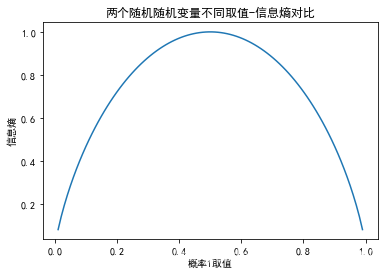

p(i|t) 节点t中，属于类别c的样本占特定节点t中样本总数的比例（概率）。

如果样本以相同的比例分布于不同的类别时，熵的值最大。如果所有的样本都属于同一个类别，则熵为0，此时，不纯度最低。

__基尼函数类似__

score函数：

交叉验证的基本思想是把在某种意义下将原始数据(dataset)进行分组,一部分做为训练集(train set),另一部分做为验证集(validation set or test set),首先用训练集对分类器进行训练,再利用验证集来测试训练得到的模型(model),以此来做为评价分类器的性能指标。

就是这么来的，先不做更加深入了解，知道可以评定性能就行了

__从基尼不纯度的计算可以看出，它的计算更加方便，是熵的一个近似值。所以含义和熵差不多，可以衡量不确定性的大小，可以衡量杂乱程度也就是不纯度。__

# 建立一棵树：

In [1]:
from sklearn import tree # 导入树模型
from sklearn.datasets import load_wine # 来个数据集
from sklearn.model_selection import train_test_split # 用来划分测试集的

In [2]:
# 探索数据：
wine = load_wine()

In [3]:
wine
# 可以看出来有各种字典，各种其他的名字信息

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
# 我只要特征和数据
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target
# 看他的标签：可以很明显看出他是一个三分类的0，1，2
# 这个标签就是上例的哺乳动物。。。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
import pandas as pd
from pandas import DataFrame

In [7]:
df = pd.concat([DataFrame(wine.data),DataFrame(wine.target)],axis = 1)
# 我这是要纵向连接
# 最后一列是标签，前面的都是特征
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine.feature_names
# 看他的属性值

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names
# 这个还可以看他各种标签的名字：有类别0，1，2

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
# 分训练集和测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
# 取0.3的数据来做测试集，0.7的数据来做训练集
#【注意：分训练集和测试集的时候一定要顺序对！！！！！要不然跑出来的东西不知所云】

In [11]:
Xtrain.shape
# 有一百124行,13个标签

(124, 13)

In [12]:
wine.data.shape

(178, 13)

In [13]:
# 下面开始建模：实例化：
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain) # 这一步就是训练
score = clf.score(Xtest,Ytest)
# 这个score就是对模型精确度的一个衡量,【所以里面传的是验证集！！！！！！】
# 返回的是一个accuracy

In [14]:
score
# 【注意！！！】之所以多次运行在之后我的score值不一样，是因为我的数据集和验证集合是随机划分的
# 每次运用的数据都不一样

0.9074074074074074

__我们知道不管是什么决策树进化版，他的优化实际上都是对五个中的某个不纯度相关的指标进行优化，不纯度是基于节点来运算的，决策树正在计数的时候实际上是通过优化节点来使不纯度最低的从而优化一整棵树的，但是就算优化了所有节点也不能保证优化出的决策树是最优的__

这就相当于我选了最饱满的种子得到的不一定是最好的树

解决方法就是种很多棵，从里面挑一棵最好的

同一个训练集和测试集种很多课树，取里面最好的树

__那么怎么样实现上面那句话呢？我们可以随机的去很多特征，从中选取不纯度最优的作为节点然后输出__

由于是随机选择的节点，那我每次得到的最优的就不一样了

个人感觉是不是和训练集验证集的划分也有一点关系呢

In [15]:
# 下面开始建模：实例化：
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(Xtrain,Ytrain) # 这一步就是训练
score = clf.score(Xtest,Ytest)

In [16]:
score

0.9259259259259259

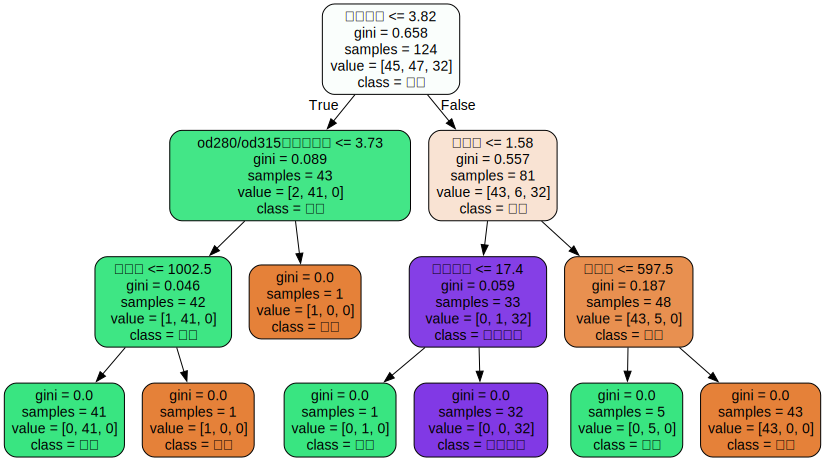

In [17]:
# 接下来就来画一棵树：
import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# 这个库要和树模型的export_graphviz这个类相互配合使用才可以
dt_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names = ["琴酒","雪莉",'贝尔摩德'],
                              filled = True,
                              rounded = True)
# 第一个参数是我简历好的模型，什么都可以，只要是训练好的就可以
# 第二个参数就是feature_names,就是红酒数据的特征上面就是已经翻译好的各种特征的名字
# 第三个就是classname就是各种标签0，1，2的名字
# 还有两个参数
# 现在就可以画图了
graph = graphviz.Source(dt_data)
graph

# 要是把featurename注释掉那上买呢就赤裸裸展示出索引，可以看出最上面哪一行特征的意思
# 要是把类名给注释掉 标签名就消失了，虽然能看到一个一个数，但是在最下面哪一行没有了，不知道是什么标签分下去了
# 下面的那个参数是指不同的标签的用颜色来填充，不同的标签填充不同的颜色
# 但是有深浅之分 白哦是越浅，不纯度就越高，越难进行判断
# 下面的rounded单纯是指框的形状是圆的

In [19]:
# 探索一下这个树，我们可以看到原来是十三列，说明有十二个特征
# 但是我们看这个树，它实际上只用到了其中的几种特征
# 这证明决策树在排列的时候用到的特征有一个重要性的排列
clf.feature_importances_
# 下面这个可以看关于我这个决策树训练出的模型里面（不同调试次数的结果可能不一样），不为零的数表示对应位置的特征对于我的决策树的建立有更重要的意义
# 数越大就越重要

array([0.02183538, 0.        , 0.02443483, 0.        , 0.        ,
       0.        , 0.39081522, 0.        , 0.        , 0.43608354,
       0.        , 0.        , 0.12683103])

特征重要性评分是一种为输入特征评分的手段，其依据是输入特征在预测目标变量过程中的有用程度。

特征重要性有许多类型和来源，尽管有许多比较常见，比如说统计相关性得分，线性模型的部分系数，基于决策树的特征重要性和经过随机排序得到重要性得分。

特征重要性在预测建模项目中起着重要作用，包括提供对数据、模型的见解，以及如何降维和选择特征，从而提高预测模型的的效率和有效性。

先不管怎么算的。。。

In [20]:
# 我用zip这个合并函数就可以直观看出来：
[*zip(feature_name,clf.feature_importances_)]
# 去掉那些为零的都没事，对于整个模型而言

[('酒精', 0.02183537935198229),
 ('苹果酸', 0.0),
 ('灰', 0.024434829274837356),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3908152155908625),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.436083542525059),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.12683103325725884)]

In [21]:
# 要是按照上一个md格子里面所说的，模型就很不稳定
# 我就导出下一个参数：randomstate有了这个参数就不会变了
# 决策树是带有随机性的,在高位数据会很明显，在这个参数后面输入【任意整数】会一直长出同一棵树，让模型更加稳定
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30)
clf = clf.fit(Xtrain,Ytrain) # 这一步就是训练
score = clf.score(Xtest,Ytest)
score

0.9074074074074074

In [22]:
# 还有另外一个参数：splitter
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ,splitter = "best")
clf = clf.fit(Xtrain,Ytrain) # 这一步就是训练
score = clf.score(Xtest,Ytest)
score
# splitter也还是来控制随机选项的，默认splitter的参数设为best会去把重要性最高的作为主要的决策对象
# 设为random可以使取得的特征更加随机【对训练集的拟合程度会更深，这是一种防止过拟合的方法】
# 可以理解，大概是模型不会去死磕最重要特征了

0.9074074074074074

In [23]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ,splitter = "random")
clf = clf.fit(Xtrain,Ytrain) # 这一步就是训练
score = clf.score(Xtest,Ytest)
score
# 有很多很多特征的时候建议加上这两个参数
# 设为random可以使取得的特征更加随机【对训练集的拟合程度会更深，这是一种防止过拟合的方法】
# 提升了表示随机性反而评分更高了，说明对于这个数据集来说，随机更好
# 实际上有时候加上splitter = random不一定有效，那就把他注释掉就行了

0.9444444444444444

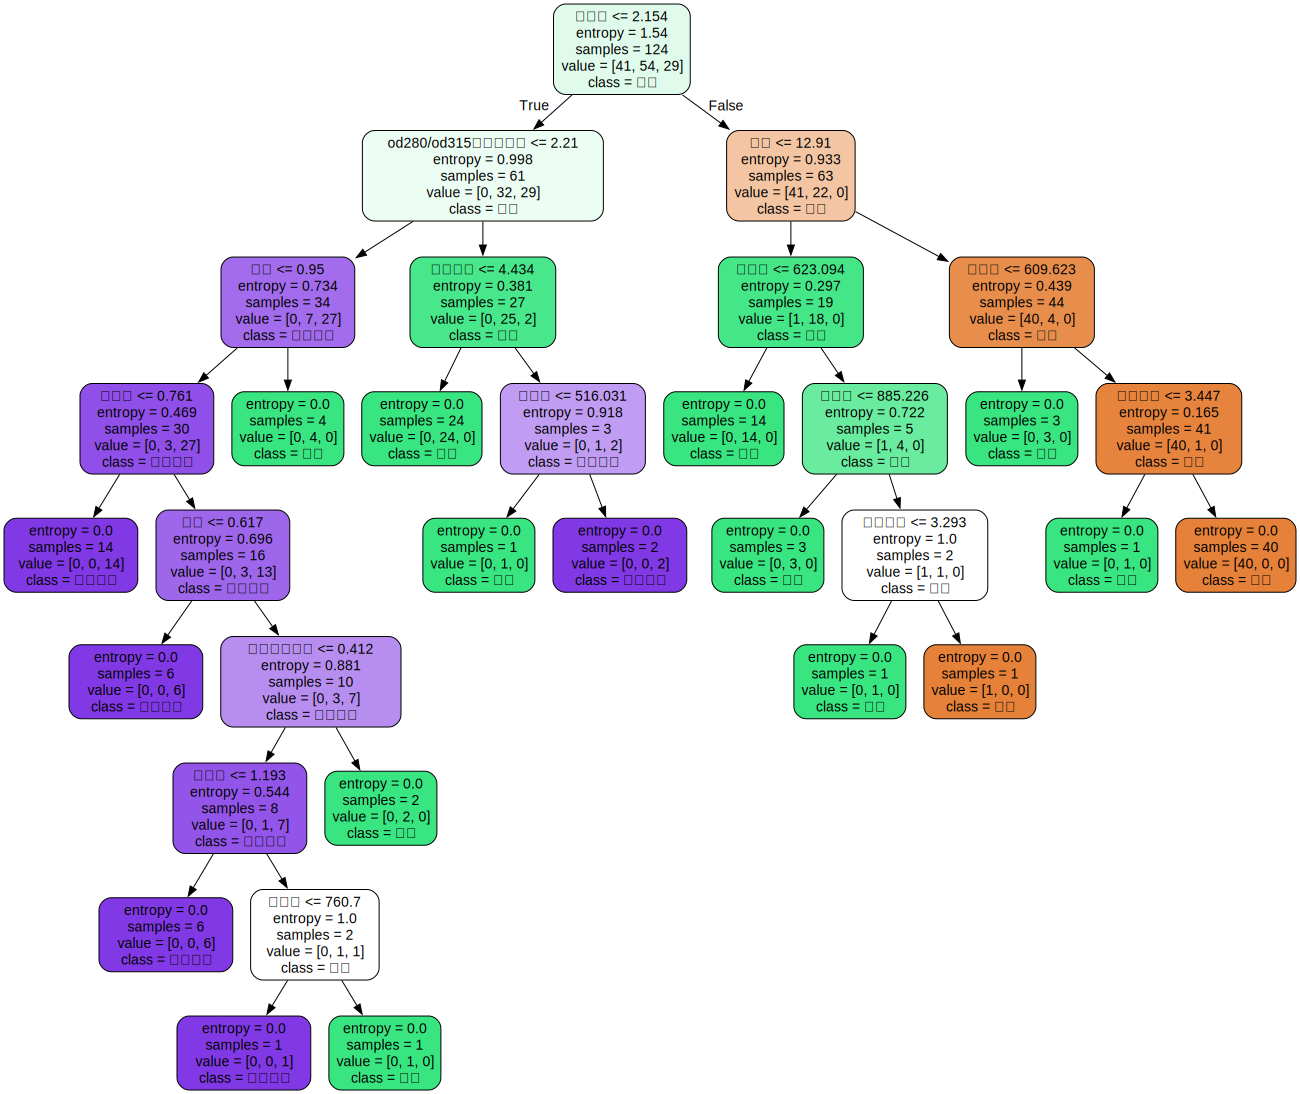

In [24]:
import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dt_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names = ["琴酒","雪莉",'贝尔摩德'],
                              filled = True,
                              rounded = True)

graph = graphviz.Source(dt_data)
graph

# 因为有些特征理论得到的重要性不高，说明相关性不高，说明里卖弄会有更多可能
# 可以看出，加上随机之后这个树更深了 

In [25]:
# 决策树的剪枝：
# 在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最有，或者没有更多特征可用为止
# 这样的决策树往往会过拟合，这就是说【他在训练集上变现很好，在测试集上却表现糟糕，不能推广到全部数据】
# 个人认为这个过拟合就是指他分的类只是根据这个样本的规律来分的，不具有普遍性，这个规律在普遍程度上根本不存在
# 我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，他找出的规则必然包括了训练样本的【噪声（真狠的规律可能在这组数据里面不太明显，找真正的规律被干扰或者被这个偏差掩盖了）】，【并使它对未知数据拟合程度不足】

score_train = clf.score(Xtrain,Ytrain)
score_train
# 看出来是一点零
# 【我去，一直没注意！！！！前面测的是训练集和测试集】
# 这里测的是训练集的
# 前面的是测试的是验证集的是0.9几已经不错了

1.0

为了让决策树更好具有泛化性，我们要对决策树进行简直。__剪枝对决策树的影响巨大，正确的减枝策略是优化决策树算法的核心__ 

# 首先是max_depth参数
有很多剪枝策略：
max_depth __限制树的最大深度，超过设定深度的树枝全部剪掉__

__最广泛的参数：基本上感觉过拟合了，上来就加一个这个maxdeptth参数__
在高维的样本的数据的时候非常有效，__决策树多生长一层，对样本的需求就会翻一倍__
__这似乎也可以理解__

__建议从3开始尝试，看看拟合效果怎么样，然后后面再决定是否要增加深度__

# 再就是min_samples_leaf & min_samples_split

__这个限定的是一个节点分支后的每一个子节点都必须包含min_samples_leaf个数据样本，否则就不会分支，或者，分支会朝着满足每一个节点都包含min_samples_leaf个样本去发生__

__这个也是搭配着max_depth使用的，在回归树中有神奇的效果，可以让回归树更加平滑。这个参数的数量设置的太小会引起过拟合，设置的太大会阻碍模型学习数据__

__一般来说建议从5开始使用__

如果叶结点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以子啊回归问题中避免低方差，过拟合的叶子节点出现。__对于类别不多的分类问题，=1是最佳选择__

__后面那一个单指一个节点必须含有min_samples_split个训练样本，这个节点才允许被分支，否则分支就不会发生。不会让节点往数量符合的方向勉强__

In [26]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ,splitter = "random"
#                                  ,max_depth=3
#                                  ,min_samples_leaf = 10
#                                  ,min_samples_split = 10
                                 )
clf = clf.fit(Xtrain,Ytrain) 
score = clf.score(Xtest,Ytest)
score

0.9444444444444444

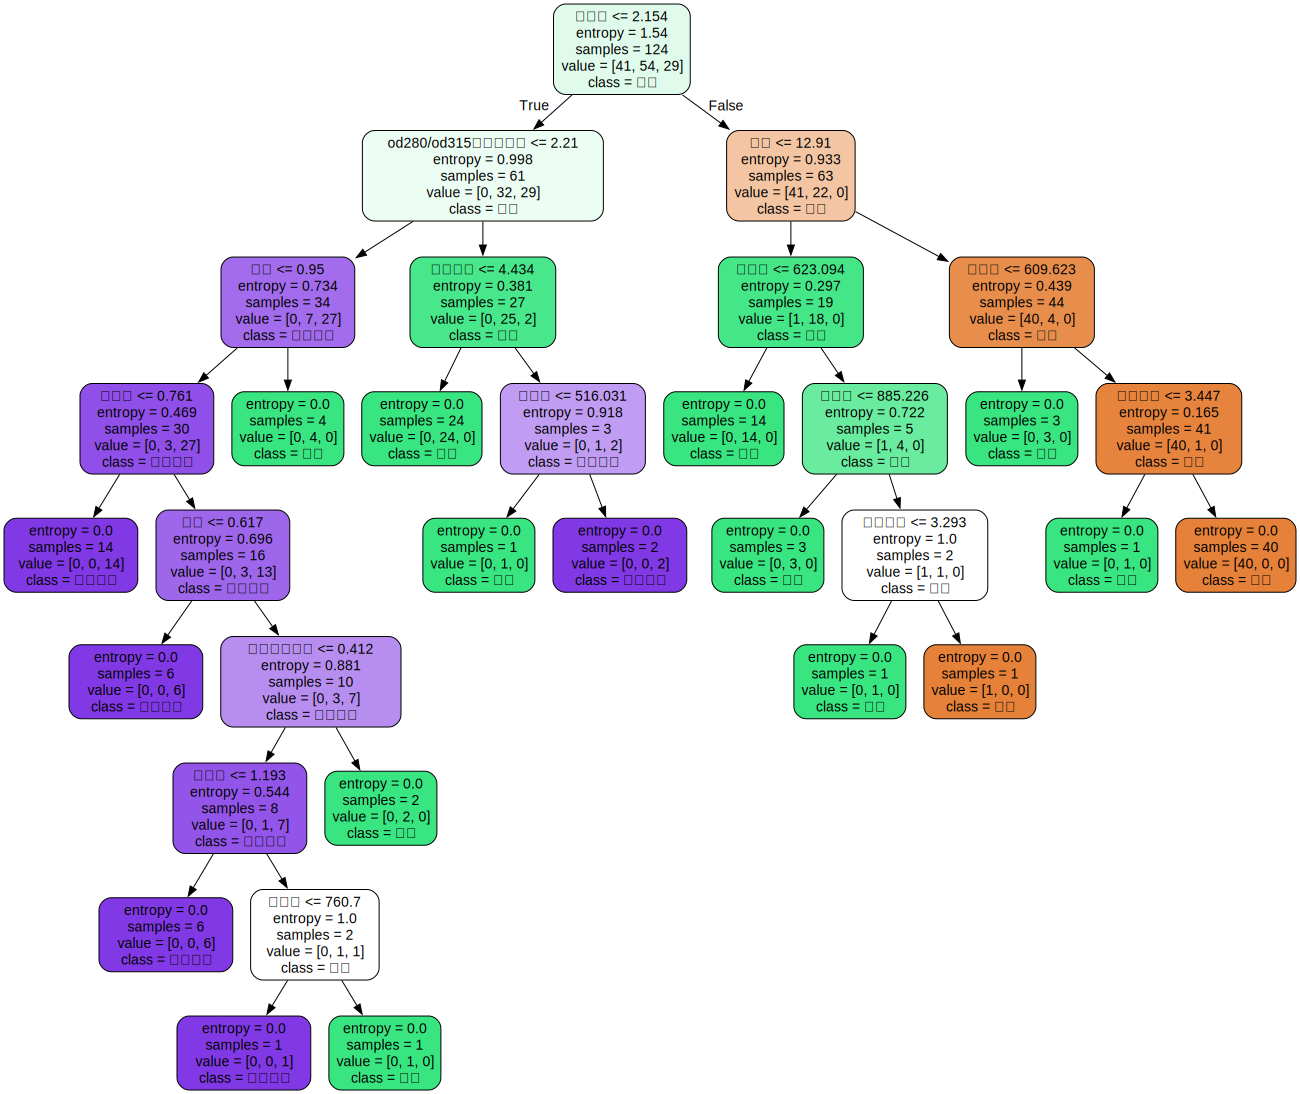

In [27]:
#feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dt_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names = ["琴酒","雪莉",'贝尔摩德'],
                              filled = True,
                              rounded = True)

graph = graphviz.Source(dt_data)
graph

__由于有random的存在，导致我的分类非常深__

In [28]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ,splitter = "random"
                                 ,max_depth=3
#                                  ,min_samples_leaf = 10
#                                  ,min_samples_split = 10
                                 )
clf = clf.fit(Xtrain,Ytrain) 
score = clf.score(Xtest,Ytest)
score
# feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

# dt_data = tree.export_graphviz(clf,
#                                feature_names = feature_name,
#                                class_names = ["琴酒","雪莉",'贝尔摩德'],
#                               filled = True,
#                               rounded = True)

# graph = graphviz.Source(dt_data)
# graph

0.9444444444444444

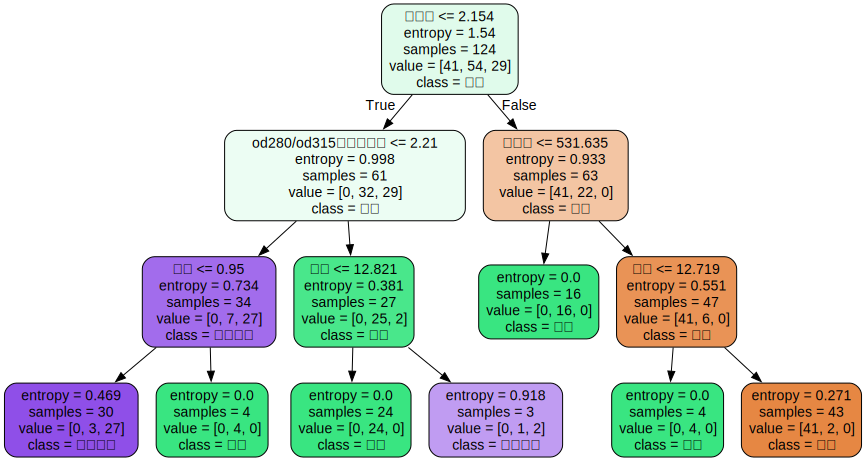

In [29]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dt_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names = ["琴酒","雪莉",'贝尔摩德'],
                              filled = True,
                              rounded = True)

graph = graphviz.Source(dt_data)
graph

__现在我设了最大层数之后可以看的出来只有三层了__

__【注意！！！】我的深度降级之后，可能我的评分还会下降！！！：意思就是我设置最大深度可以防止过拟合但是不一定能提高精度__

In [30]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ,splitter = "random"
                                 ,max_depth=3
                                 ,min_samples_leaf = 10
#                                  ,min_samples_split = 10
                                 )
# 下面我松开注释，最下面叶子节点的样本数不足十的会被看砍掉，或者右节点会朝着有十个样本改变
clf = clf.fit(Xtrain,Ytrain) 
score = clf.score(Xtest,Ytest)
score

0.9074074074074074

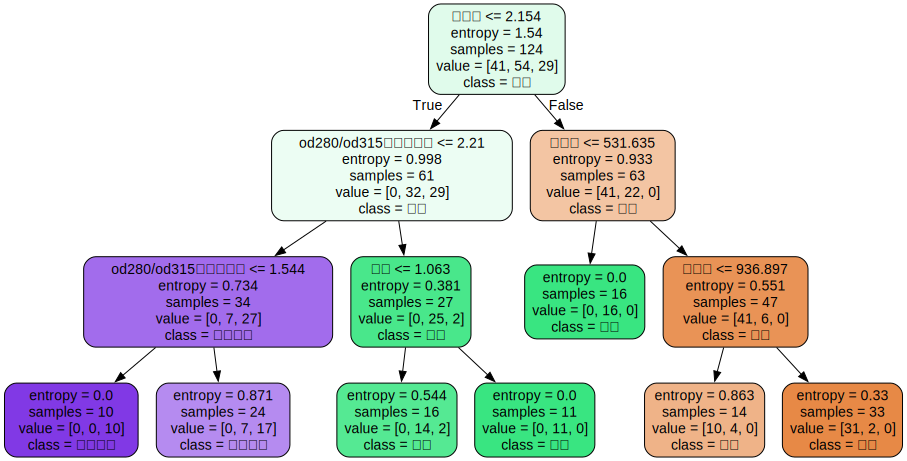

In [31]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dt_data = tree.export_graphviz(clf,
                               feature_names = feature_name,
                               class_names = ["琴酒","雪莉",'贝尔摩德'],
                              filled = True,
                              rounded = True)

graph = graphviz.Source(dt_data)
graph

__可以看出来我的样本量都大于十了__

本质上来看就是把决策树变小了

# 还有两个参数

__max_features & min_impurity_decrease__

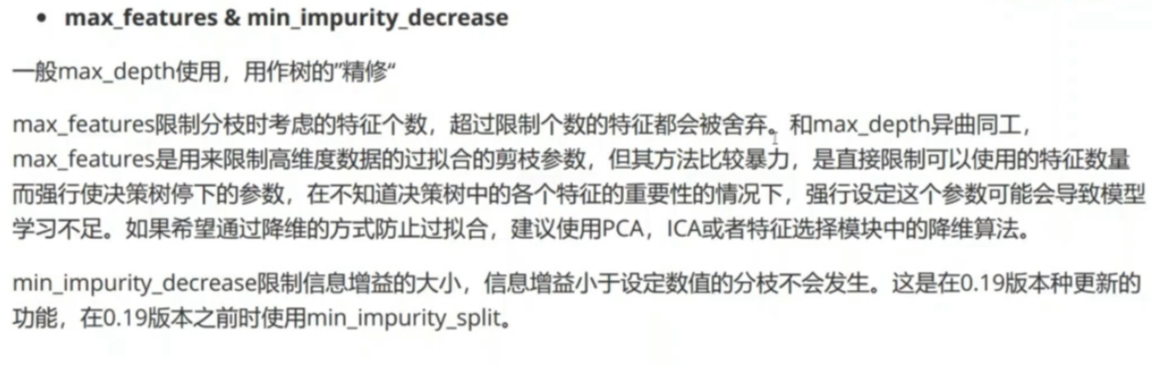

__这个第一个参数就是非常暴力，连特征都不给你用了，但是我们在不知道决策树各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足__

__后面那一个就是限制信息增益的大小，信息增益（父节点的信息熵减去子节点的信息熵）小于设定数值，分支不会发生__

# 那么具体怎么确定每个参数填写什么值呢？
__这时候就用超参数的曲线来判断__ 继续使用这个模型，横坐标是以超参数（max_depth为横坐标）模型的度量指标作为纵坐标的线，他是用来衡量不同超参数区直辖模型的表现的线

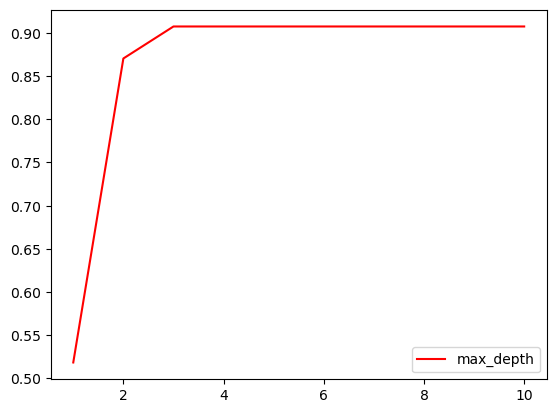

In [38]:
import matplotlib.pyplot as plt

test = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1
                                     ,criterion = "entropy"
                                     ,random_state = 30
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color = "red",label = "max_depth")
plt.legend()
plt.show()
# 最后就会打到某一个值之后就平稳了
# 可以看出来选三就行了，否则就浪费了

__调参没有绝对的答案一切看数据本身，减枝不一定就会更好，先设置好减枝参数更好__

In [42]:
clf.apply(Xtest)
# 返回的是每个测试样本所在的叶子节点的索引

array([ 5,  2, 10, 10,  2,  5, 10,  2,  5,  2,  5, 10, 10, 10,  2, 10, 10,
       10,  5,  2,  5,  5,  8,  5, 10,  2,  8, 10,  2,  5,  5,  8,  2,  5,
        5,  5,  8,  5,  5,  5,  2,  2, 10,  2, 10,  2,  5, 10,  5,  2,  2,
        2,  5,  5], dtype=int64)

In [41]:
clf.predict(Xtest)
# 这个返回的是每个测试样本的分类/回归结果
# 就是返回标签

array([2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 2])